In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import joblib

import plotly.graph_objects as go

from cfl.cluster_methods.kmeans import KMeans
from cfl.experiment import Experiment
from visual_bars import generate_visual_bars_data as vbd
from cfl.util.data_processing import one_hot_encode
from cfl.dataset import Dataset
from cfl.visualization_methods import clustering_to_sankey as sk


In [3]:
# create a visual bars data set 

n_samples = 10000
noise_lvl = 0.0
im_shape = (10, 10)
print('Generating a visual bars dataset with {} samples at noise level {}'.format(n_samples, noise_lvl))

vb_data = vbd.VisualBarsData(n_samples=n_samples, im_shape = im_shape, noise_lvl=noise_lvl)

x = vb_data.getImages()
y = vb_data.getTarget()
 
# format data 
x = np.reshape(x, (n_samples, np.prod(im_shape)))
y = one_hot_encode(y, unique_labels=[0,1])

Generating a visual bars dataset with 10000 samples at noise level 0.0


In [4]:
print(x.shape)
print(y.shape)

(10000, 100)
(10000, 2)


In [5]:
# create a CDE-only experiment with visual bars data and train 
data_info = { 'X_dims' : x.shape, 
              'Y_dims' : y.shape, 
              'Y_type' : 'categorical' } 

# CDE parameters
CDE_params = {  'batch_size': 32,
                'optimizer': 'adam', 
                'n_epochs': 30, 
                 }
                            
block_names = ['CondExpVB']
block_params = [CDE_params]

# save_path = '/Users/imanwahle/Desktop/cfl/examples/exp_results'
save_path = 'C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test'
my_exp = Experiment(X_train=x, Y_train=y, data_info=data_info, block_names=block_names, block_params=block_params, blocks=None, results_path=save_path)


All results from this run will be saved to C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test\experiment0007
opt_config not specified in input, defaulting to {}
verbose not specified in input, defaulting to 1
dense_units not specified in input, defaulting to [50, 2]
activations not specified in input, defaulting to ['relu', 'linear']
dropouts not specified in input, defaulting to [0, 0]
weights_path not specified in input, defaulting to None
loss not specified in input, defaulting to mean_squared_error
show_plot not specified in input, defaulting to True
name not specified in input, defaulting to CondExpVB
standardize not specified in input, defaulting to False
best not specified in input, defaulting to True


In [6]:
# # load the CDE results  
# import joblib
# import os
# cde_results_dict = joblib.load(os.path.join('/', save_path, 'experiment0007/dataset_train/CondExpVB_results.pickle'))

# pyx = cde_results_dict['pyx']
# # load CondExpVB_results 
# # format is a results dict 
# # want the [pyx] from the results 

In [7]:
# # pyx is an array n_samples long
# # where the first entry in each row is P(y=0 | X=x) and the 
# # second entry is P(y=1 | X=x) 
# # (the first and second entry of each row roughly add up to 1)
# pyx.shape
# pyx[:10]

In [8]:
# # create a number of Kmeans objects with different Ks 
# k_range = range(2, 8)

# kmeans_l = []
# for n_clusters in k_range:
#     params = {'n_Xclusters': n_clusters, 'n_Yclusters': 2} 
#     kmeans_obj = KMeans('Kmeans', data_info, params, random_state=143)
#     kmeans_l.append(kmeans_obj)

# data = Dataset(x, y)

# # trained all the data on the kmeanss 
# x_lbls_L = []
# for kmeans_obj in kmeans_l: 
#   cluster_results = kmeans_obj.train(data, cde_results_dict)
#   x_lbls_L.append(cluster_results['x_lbls'])

In [9]:
# data = Dataset(x, y)

# # trained all the data on the kmeanss 
# x_lbls_L = []
# for kmeans_obj in kmeans_l: 
#   cluster_results = kmeans_obj.train(data, cde_results_dict)
#   x_lbls_L.append(cluster_results['x_lbls'])

In [10]:

# truth = vb_data.getGroundTruth()
# plot_idx = np.random.choice(pyx.shape[0], 1000, replace=False)
# plt.scatter(range(1000), pyx[plot_idx,1], c=truth[plot_idx])
# plt.show()

# for i in range(4):
#     print('Average prediction for x-class {}: {:.2f}'.format(i, np.mean(pyx[truth==i,1])))


# # I don't know what to make of this. Is learning 3 distinct types of thing, but what are these? 

In [11]:
# #### sankey diagram 

# link, label = sk.convert_lbls_to_sankey_nodes(x_lbls_L)
# # plot
# fig = go.Figure(data=
#           [go.Sankey(node = dict(pad = 15, thickness=20, label = label, color =  "blue"),
#                      link = link)])
    
# fig.update_layout(title_text="Visual Bars Clustering with n_clusters 2 to 7", font_size=10)
# fig.show()

In [12]:
# after looking through these images, I realized that the cde/clusterer was doing a really bad job of classifying the images. So I redid with another CDE that learned them better 



In [13]:
# create a visual bars data set 

n_samples = 10000
noise_lvl = 0.0
im_shape = (10, 10)
random_seed = 143
print('Generating a visual bars dataset with {} samples at noise level {}'.format(n_samples, noise_lvl))

vb_data = vbd.VisualBarsData(n_samples=n_samples, im_shape = im_shape, noise_lvl=noise_lvl, set_random_seed=random_seed)

ims = vb_data.getImages()
y = vb_data.getTarget()
 
# format data 
x = np.expand_dims(ims, -1)

y = one_hot_encode(y, unique_labels=[0,1])

Generating a visual bars dataset with 10000 samples at noise level 0.0


All results from this run will be saved to C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test2\experiment0001
lr specified but not used by CondExpKC clusterer
opt_config not specified in input, defaulting to {}
verbose not specified in input, defaulting to 1
dense_units not specified in input, defaulting to [50, 2]
activations not specified in input, defaulting to ['relu', 'linear']
dropouts not specified in input, defaulting to [0, 0]
weights_path not specified in input, defaulting to None
loss not specified in input, defaulting to mean_squared_error
show_plot not specified in input, defaulting to True
name not specified in input, defaulting to CondExpKC
standardize not specified in input, defaulting to False
best not specified in input, defaulting to True
Training CFL pipeline.
Epoch 1/3
235/235 [==============================] - 1s 4ms/step - loss: 0.1764 - val_loss: 0.1471
Epoch 2/3
235/235 [==============================] - 1s 4ms/step - loss: 0.1389 - val_loss: 0.1420
Epoch 3

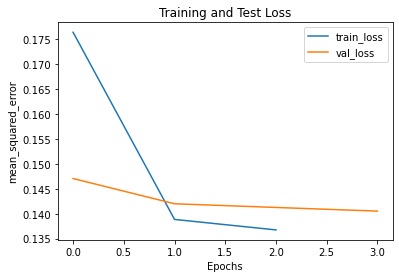

Loading parameters from  tmp_checkpoints/best_weights
Saving parameters to  C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test2\experiment0001\trained_blocks\CondExpKC


{'CondExpKC': {'train_loss': [0.17640170454978943,
   0.13885444402694702,
   0.13674898445606232],
  'val_loss': [0.1470574289560318, 0.14199288189411163, 0.14051881432533264],
  'loss_plot': <Figure size 432x288 with 1 Axes>,
  'model_weights': [array([[ 1.0287337e-02, -1.4934646e-01, -1.4442839e-01, ...,
           -1.2999956e-01,  1.7568122e-01, -1.8898150e-01],
          [ 1.2410834e-01,  1.4128223e-02,  1.4761160e-03, ...,
            3.5307385e-02,  2.2449553e-01,  1.3747522e-01],
          [ 1.7249510e-02,  7.7995546e-02,  7.1494013e-02, ...,
           -1.1200638e-04,  1.9588313e-01, -2.1640094e-01],
          ...,
          [ 1.4348434e-01, -2.8043019e-02, -8.3856098e-02, ...,
            8.9287631e-02,  2.1351641e-02, -3.8820241e-02],
          [ 2.0707759e-01, -1.5568440e-01, -8.9510620e-02, ...,
           -1.3488577e-01,  1.4624141e-01, -6.0987476e-02],
          [-1.1866948e-01, -2.7203536e-01, -5.3468034e-02, ...,
            6.8823799e-02,  1.6401187e-01,  1.3126431e-0

In [51]:
lr = 1e-4 # this was 1e-3 in Chalupka's code
CDE_params = {  'batch_size': 32, # this was 10 in Chalupka's code
                    'lr': lr, 
                    'optimizer': 'adam', 
                    'n_epochs': 3, 
                    # 'standardize': True
                 }
data_info = {'X_dims': x.shape, 
             'Y_dims': y.shape, 
             'Y_type': 'categorical'}

block_names = ['CondExpKC']
block_params = [CDE_params]

# save_path = '/Users/imanwahle/Desktop/cfl/examples/exp_results'
save_path = 'C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test2'
my_exp = Experiment(X_train=x, Y_train=y, data_info=data_info, block_names=block_names, block_params=block_params, blocks=None, results_path=save_path)

my_exp.train()

In [53]:
cde_results_dict = joblib.load(os.path.join('/', save_path, 'experiment0001/dataset_train/CondExpKC_results.pickle'))

pyx = cde_results_dict['pyx']


In [54]:
# pyx is n samples long, each subarray contains (P(Y=0), P(Y=1))
pyx[:10]

array([[0.6963147 , 0.3036853 ],
       [0.69003534, 0.30996463],
       [0.05203187, 0.9479681 ],
       [0.8899807 , 0.11001937],
       [0.02429528, 0.9757047 ],
       [0.8899807 , 0.11001937],
       [0.21077533, 0.7892246 ],
       [0.50975925, 0.49024078],
       [0.57158005, 0.42841992],
       [0.8899807 , 0.11001937]], dtype=float32)

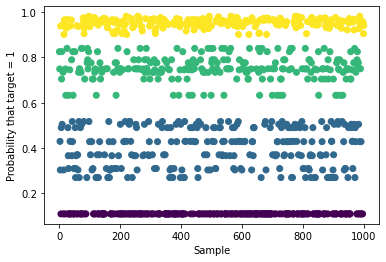

Average prediction for x-class 0: 0.11
Average prediction for x-class 1: 0.40
Average prediction for x-class 2: 0.75
Average prediction for x-class 3: 0.95


In [55]:

truth = vb_data.getGroundTruth()

#choose a thousand random samples from the pyx results 
plot_idx = np.random.choice(pyx.shape[0], 1000, replace=False)

# plot them 
plt.scatter(range(1000), pyx[plot_idx,1], c=truth[plot_idx])
plt.ylabel("Probability that target = 1")
plt.xlabel("Sample")
plt.show()

for i in range(4):
    print('Average prediction for x-class {}: {:.2f}'.format(i, np.mean(pyx[truth==i,1])))

# this cde is more or less learning the right kind of thing, but the 'bands' of conditional probabilities learned are kind of weird. 

In [56]:
# # this graph is the reverse of the above graph
# plt.scatter(range(1000), pyx[plot_idx,0], c=truth[plot_idx])
# plt.ylabel("Probability that target = 0")
# plt.xlabel("Sample")
# plt.show()

# for i in range(4):
#     print('Average prediction for x-class {}: {:.2f}'.format(i, np.mean(pyx[truth==i,0])))


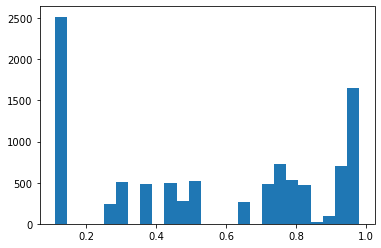

In [57]:
# show all the probabilities that y=1
plt.hist(pyx[:, 1], bins=25)
plt.show()

#same info as above, in a hist

In [58]:
# create a number of Kmeans objects with different Ks 
k_range = range(2, 8)

kmeans_l = []
for n_clusters in k_range:
    params = {'n_Xclusters': n_clusters, 'n_Yclusters': 2} 
    kmeans_obj = KMeans('Kmeans', data_info, params, random_state=143)
    kmeans_l.append(kmeans_obj)

data = Dataset(x, y)

# trained all the data on the kmeanss 
x_lbls_L = []
for kmeans_obj in kmeans_l: 
  cluster_results = kmeans_obj.train(data, cde_results_dict)
  x_lbls_L.append(cluster_results['x_lbls'])

In [60]:
link, label = sk.convert_lbls_to_sankey_nodes(x_lbls_L)
# plot
fig = go.Figure(data=
          [go.Sankey(node = dict(pad = 15, thickness=20, label = label, color =  "blue"),
                     link = link)])
    
fig.update_layout(title_text="Visual Bars Clustering, no noise, with 2 to 7 Clusters", font_size=10)
fig.show()

In [61]:
x_lbls_L[2][plot_idx].shape


(1000,)

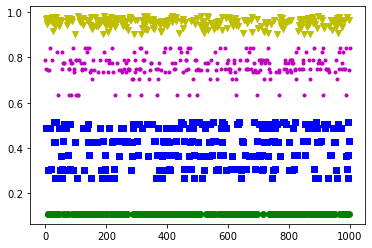

In [62]:
truth = vb_data.getGroundTruth()


# plot them 
markers = ["." , "," , "o" , "v" ]
colors = ['g','b', 'm', 'y']

#choose a thousand random samples from the pyx results 
plot_idx = np.random.choice(pyx.shape[0], 1000, replace=False)

# for each sample 
for i in range(1000):  
    pi = pyx[plot_idx[i],1] # plot probability  
    mi = markers[x_lbls_L[2][plot_idx[i]]] #marker based on cluster assignment
    ci = colors[truth[plot_idx[i]]] #color based on ground truth class

    plt.scatter(i,pi, marker=mi, color=ci) 
plt.show() 

In [63]:
from cfl.visualization_methods import general_vis as vis

# vis.view_class_examples(ims, im_shape, 10, x_lbls_L[0])

In [64]:
# vis.view_class_examples(ims, im_shape, 10, x_lbls_L[1])

In [65]:
# vis.view_class_examples(ims, im_shape, 10, x_lbls_L[2])

In [66]:
# vis.view_class_examples(ims, im_shape, 10, x_lbls_L[3])

In [67]:
# vis.view_class_examples(ims, im_shape, 10, x_lbls_L[4])

In [68]:
# vis.view_class_examples(ims, im_shape, 10, x_lbls_L[5])

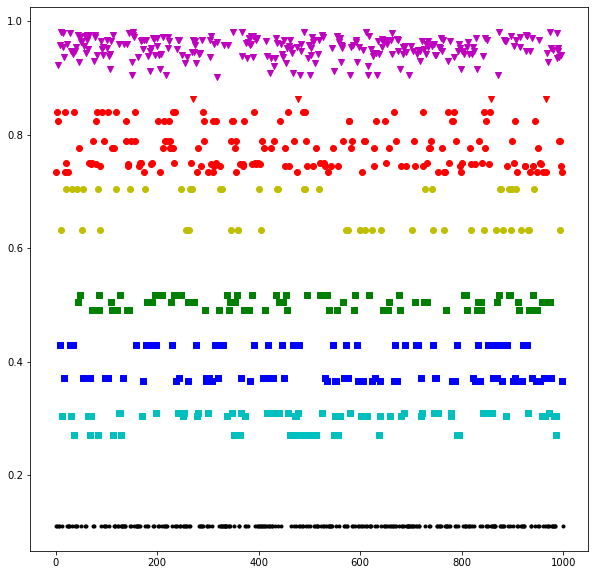

In [69]:
truth = vb_data.getGroundTruth()


# plot them 
markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
colors = ['c','m', 'y', 'k', 'r', 'g','b']


#choose a thousand random samples from the pyx results 
plot_idx = np.random.choice(pyx.shape[0], 1000, replace=False)

# for each sample 
fig = plt.figure(figsize=(10, 10))
for i in range(1000):  
    pi = pyx[plot_idx[i],1] # plot probability  
    mi = markers[truth[plot_idx[i]]] #marker based on ground truth 
    ci = colors[x_lbls_L[5][plot_idx[i]]] #color based on cluster assignment 

    plt.scatter(i,pi, marker=mi, color=ci) 
plt.show() 

## This plot shows that  

# Uneven starting distribution

In [82]:
# create a visual bars data set 

n_samples = 10000
noise_lvl = 0.0
im_shape = (10, 10)
print('Generating a visual bars dataset with {} samples at noise level {}'.format(n_samples, noise_lvl))

vb_data = vbd.VisualBarsData(n_samples=n_samples, im_shape = im_shape, noise_lvl=noise_lvl)

x = vb_data.getImages()
y = vb_data.getTarget()
 
# format data 
x = np.reshape(x, (n_samples, np.prod(im_shape)))

### make uneven starting distribution 
starting_dist = [0.3, 0.2, 0.4, 0.1]
gt = vb_data.getGroundTruth()
(_, counts) = np.unique(gt, return_counts=True)
new_len = (counts[2]/starting_dist[2]).astype('int')
print("New number of samples: ", new_len)
num_of_each_kind = (np.array(starting_dist) *new_len).astype('int')
print(num_of_each_kind)

Generating a visual bars dataset with 10000 samples at noise level 0.0
New number of samples:  6287
[1886 1257 2514  628]


In [77]:
y.shape

(10000, 2)

In [83]:
from cfl.util.x_lbl_util import rows_where_each_x_class_occurs

In [94]:
gt_indices = rows_where_each_x_class_occurs(gt)
gt_new = [0] * num_of_each_kind[0] + [1] * num_of_each_kind[1] + [2] * num_of_each_kind[2] + [3] * num_of_each_kind[3]
gt_new = np.array(gt_new)

In [85]:
uneven_samples = np.zeros((new_len, x.shape[1]))
uneven_targets = np.zeros((new_len, 1))

counter = 0
for gt_class in np.unique(gt):  # gt classes are 0, 1, 2, 3 (same as indices)
    for sample in range(num_of_each_kind[gt_class]): 
        uneven_samples[counter] = x[gt_indices[gt_class][sample]]
        uneven_targets[counter] = y[gt_indices[gt_class][sample]]
        counter += 1 

All results from this run will be saved to C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test3\experiment0003
lr specified but not used by CondExpMod clusterer
opt_config not specified in input, defaulting to {}
verbose not specified in input, defaulting to 1
dense_units not specified in input, defaulting to [50, 1]
activations not specified in input, defaulting to ['relu', 'linear']
dropouts not specified in input, defaulting to [0, 0]
weights_path not specified in input, defaulting to None
loss not specified in input, defaulting to mean_squared_error
show_plot not specified in input, defaulting to True
name not specified in input, defaulting to CondExpMod
standardize not specified in input, defaulting to False
best not specified in input, defaulting to True
Training CFL pipeline.
Epoch 1/3
148/148 [==============================] - 1s 5ms/step - loss: 0.1889 - val_loss: 0.1652
Epoch 2/3
148/148 [==============================] - 0s 3ms/step - loss: 0.1655 - val_loss: 0.1680
Epoch

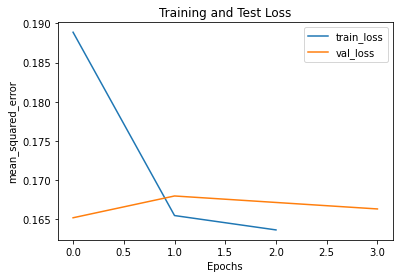

Loading parameters from  tmp_checkpoints/best_weights
Saving parameters to  C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test3\experiment0003\trained_blocks\CondExpMod


In [105]:
lr = 1e-4 # this was 1e-3 in Chalupka's code
CDE_params = {  'batch_size': 32, # this was 10 in Chalupka's code
                    'lr': lr, 
                    'optimizer': 'adam', 
                    'n_epochs': 3, 
                    # 'standardize': True
                 }
data_info = {'X_dims': uneven_samples.shape, 
             'Y_dims': uneven_targets.shape, 
             'Y_type': 'categorical'}

block_names = ['CondExpMod']
block_params = [CDE_params]

# save_path = '/Users/imanwahle/Desktop/cfl/examples/exp_results'
save_path = 'C:/Users/yumen/Documents/Schmidt Academy/cfl/vb_k_test3'
my_exp2 = Experiment(X_train=uneven_samples, Y_train=uneven_targets, data_info=data_info, block_names=block_names, block_params=block_params, blocks=None, results_path=save_path)

results_dict = my_exp2.train()

In [106]:
pyx = results_dict['CondExpMod']['pyx']

In [108]:
pyx

array([[0.08038262],
       [0.08038262],
       [0.08038262],
       ...,
       [0.9828478 ],
       [0.08038262],
       [0.08038262]], dtype=float32)

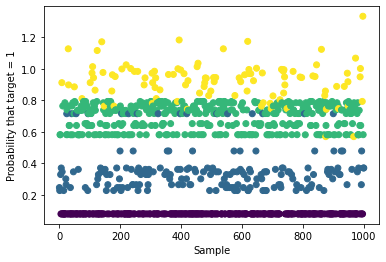

IndexError: boolean index did not match indexed array along dimension 0; dimension is 6287 but corresponding boolean dimension is 6285

In [114]:
#choose a thousand random samples from the pyx results 
plot_idx = np.random.choice(pyx.shape[0], 1000, replace=False)

# plot them 
plt.scatter(range(1000), pyx[plot_idx,0], c=gt_new[plot_idx])
plt.ylabel("Probability that target = 1")
plt.xlabel("Sample")
plt.show()

for i in range(4):
    print('Average prediction for x-class {}: {:.2f}'.format(i, np.mean(pyx[gt_new==i,1])))

# this cde is more or less learning the right kind of thing, but the 'bands' of conditional probabilities learned are kind of weird. 

In [96]:
pyx.shape

(10000, 2)